In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/baskin_robbins_classifier.csv'
df = pd.read_csv(url)
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   Category           70 non-null     object 
dtypes: float64(3), int64(3), object(2)
memory usage: 4.5+ KB


In [4]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')

In [5]:
cols = ['Calories','Total Fat (g)','Trans Fat (g)','Carbohydrates (g)','Sugars (g)','Protein (g)']

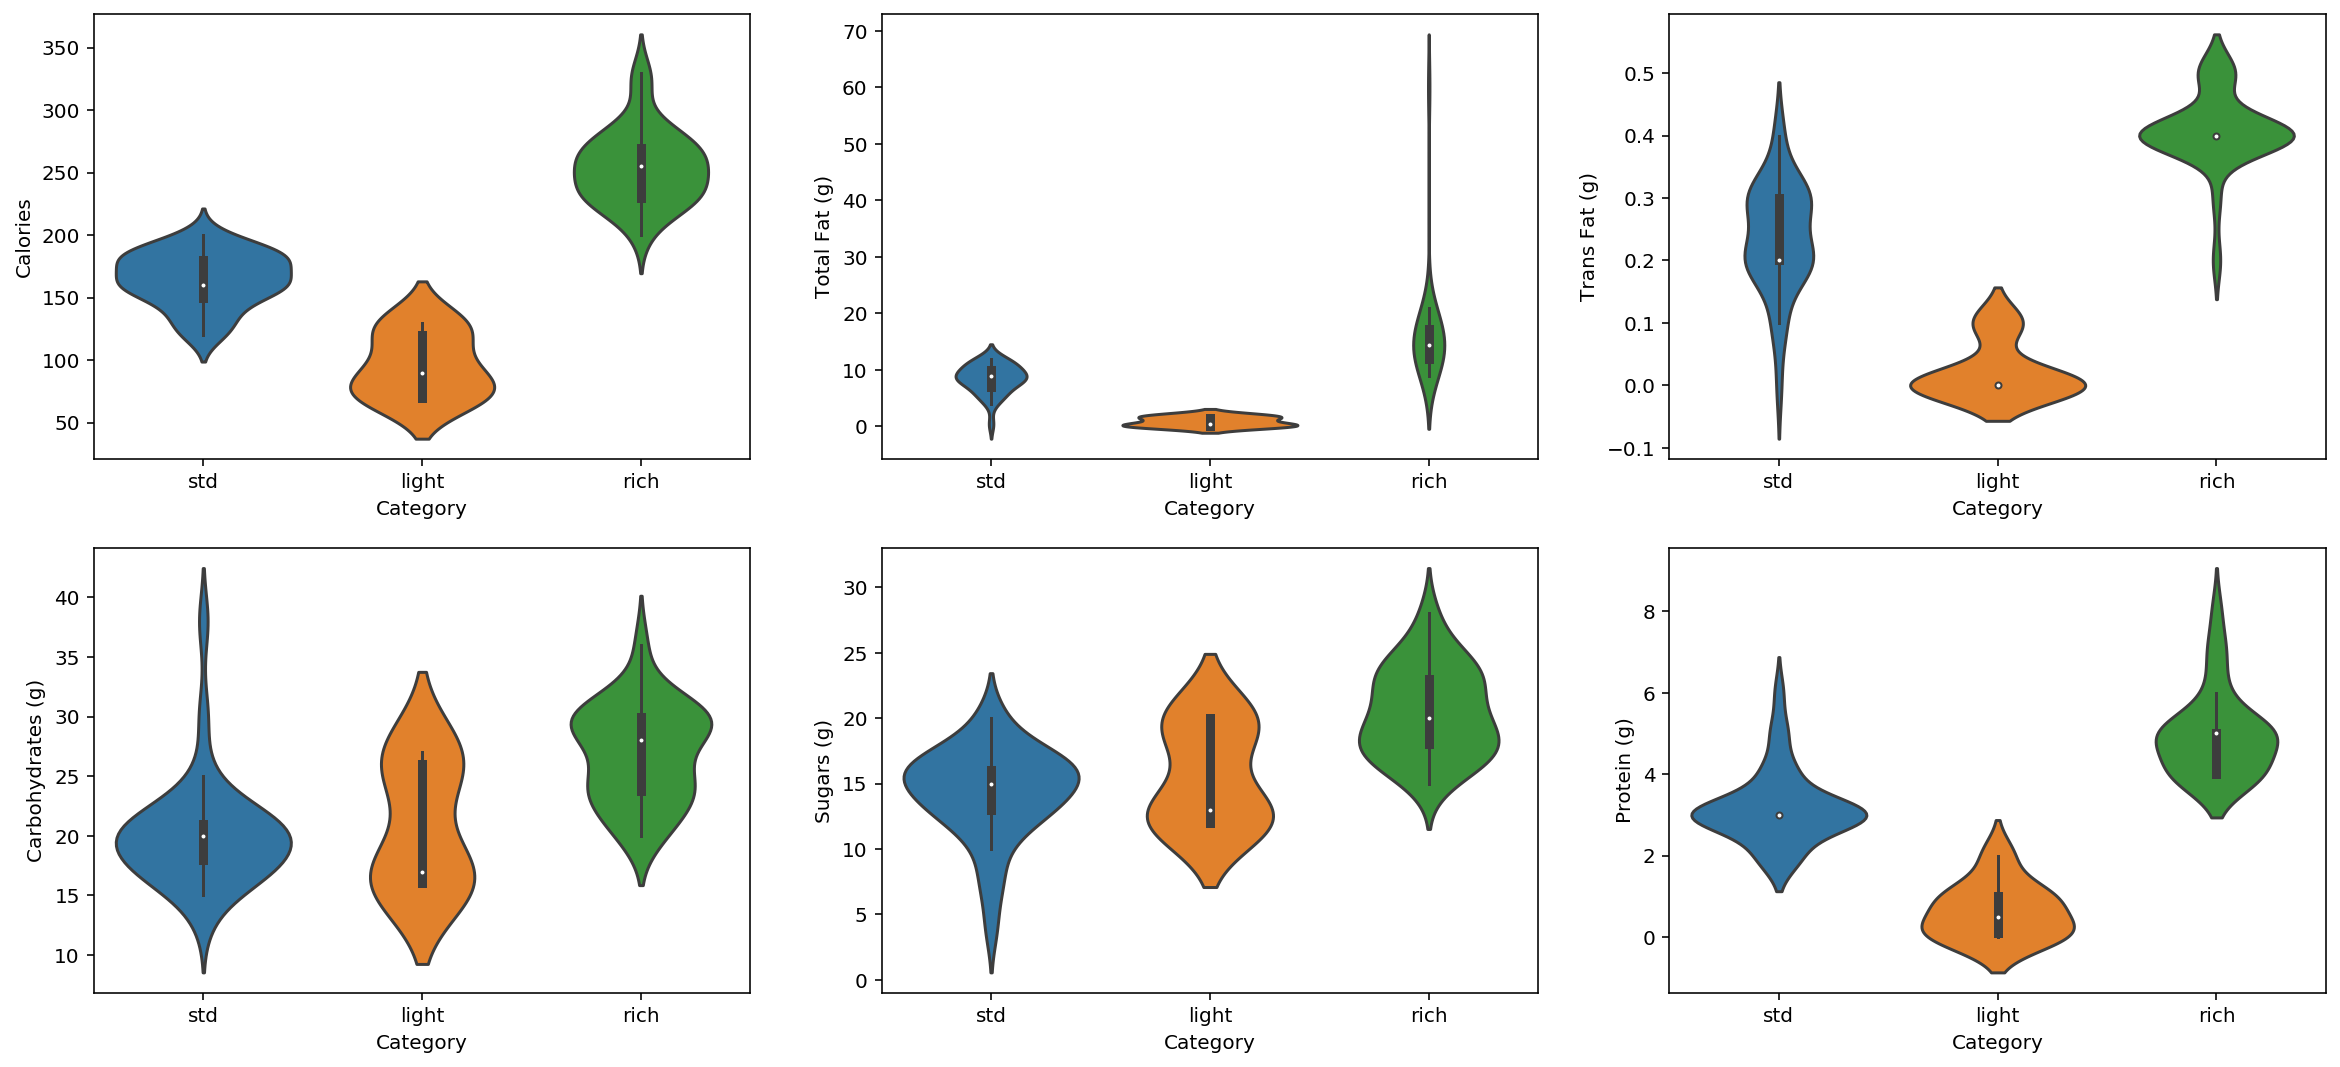

In [6]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(20,9))
ax = ax.ravel()
for i,col in enumerate(cols):
    sns.violinplot(x='Category',y=col,data=df,ax=ax[i])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [8]:
x = df[cols] #feature
y = df['Category'] #label

In [9]:
x_train,x_test,y_train,y_tset = train_test_split(x,y,test_size = 0.2,stratify =y,random_state= 7)

In [10]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
x_train.columns

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)',
       'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [12]:
fs = pd.Series(model.feature_importances_,index=x_train.columns)
print(fs)

Calories             0.623679
Total Fat (g)        0.319014
Trans Fat (g)        0.000000
Carbohydrates (g)    0.000000
Sugars (g)           0.057307
Protein (g)          0.000000
dtype: float64


In [13]:
y_train.value_counts()

std      26
rich     23
light     7
Name: Category, dtype: int64

In [14]:
print(y_train.value_counts())

std      26
rich     23
light     7
Name: Category, dtype: int64


In [18]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import graphviz

In [19]:
dotdata = StringIO()
export_graphviz(model,out_file=dotdata,feature_names=cols,class_names=['light','rich','std'],filled=True,rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dotdata.getvalue())


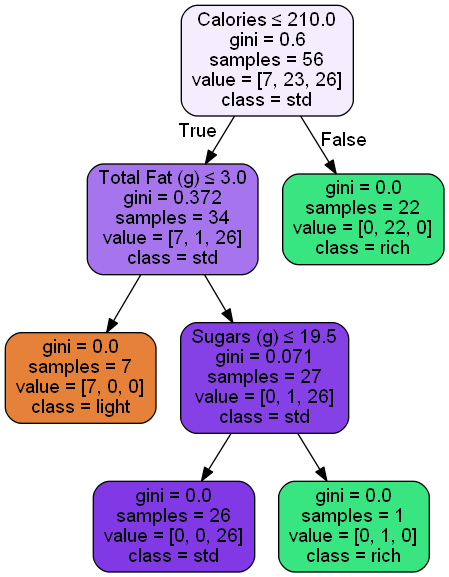

In [20]:
Image(graph.create_png())